## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

***The database Global terrorism gives us the information of terrorist attacks around the world from 1970 through 2017.
Through this database we have to find answers for the following questions***

1. Relation of the dataset
2. What are the most regions which were attacked?
3. Which country had the highest number of terrorist attacks around the world from 1970 through 2017?
4. What were the attack types adopted by the terrorists to spread terrorism?
5. What were the things which were targetted the most?
6. On which year the attacks were the most and which year attacks were the least?
7. What were the casualties (killed, wounded)?
8. Which types of weapons were used by the terrorists most?
9. Which were the top leading gangs?


## Importing all the libraries that are required for Analysis

TO DO :

1--DOWNLOADING THE DATA.

2--DATA PREPARATION AND CLEANING.

3--EXPLORATION OF DATA.

4--VISUALIZATION OF DATA.

5--CONCLUSION.

In [ ]:
#Importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Providing the path

path = ('/content/drive/MyDrive/Colab Notebooks/Global Terrorism Data.csv')
terrorism_df = pd.read_csv(path, encoding = 'ISO-8859-1')
print("Data has been successfully imported")

Data has been successfully imported


## Gathering information about the provided data

In [ ]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
terrorism_df.shape

(181691, 135)

In [ ]:
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
terrorism_df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## Cleaning the dataset

In [ ]:
terrorism_df.columns

In [ ]:
# RENAMING THE COLUMNS
terrorism_df.rename(columns = {'iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country','region_txt':'Region', 'attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                               'weaptype1_txt':'Weapon_type','nkill':'Killed','gname':'Gang_name', 'nwound':'Wounded','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary',}, inplace = True)
terrorism_df

In [ ]:
terrorism_df = terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Gang_name','Weapon_type','Killed','Wounded','Latitude','Longitude','Summary']]

In [ ]:
terrorism_df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
Attack_type        0
Target_type        0
Gang_name          0
Weapon_type        0
Killed         10313
Wounded        16311
Latitude        4556
Longitude       4557
Summary        66129
dtype: int64

In [ ]:
#Filling the nan values in state column as unknown
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [ ]:
#Filling the nan values in city column as unknown
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [ ]:
#Filling the nan values in killed column as 0
terrorism_df['Killed']=terrorism_df['Killed'].fillna(0)

In [ ]:
#Filling the nan values in killed column as 0
terrorism_df['Wounded']=terrorism_df['Wounded'].fillna(0)

In [ ]:
#Filling the nan values of Latitude to 0
terrorism_df['Latitude'] = terrorism_df['Latitude'].fillna(0)

In [ ]:
#Filling the nan values of Longitude to 0
terrorism_df['Longitude'] = terrorism_df['Longitude'].fillna(0)

In [ ]:
#Filling the nan values in summary column as unknown
terrorism_df['Summary']=terrorism_df['Summary'].fillna('Unknown')

In [ ]:
terrorism_df["Casualty"]=terrorism_df["Killed"]+terrorism_df["Wounded"]

In [ ]:
terrorism_df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
State          0
City           0
Attack_type    0
Target_type    0
Gang_name      0
Weapon_type    0
Killed         0
Wounded        0
Latitude       0
Longitude      0
Summary        0
Casualty       0
dtype: int64

In [ ]:
#Statistical presentation of the dataset
terrorism_df.describe()

,Year,Month,Day,Killed,Wounded,Latitude,Longitude,Casualty
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,22.909109,-4.471911e+02,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,18.699442,2.021946e+05,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,9.518645,1.231572e+00,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,31.126646,4.314357e+01,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,34.538561,6.835734e+01,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,74.633553,1.793667e+02,9574.000000


## EXPLORING THE DATA AND VISUALIZING IT 

***1. Relation of the dataset-***

In [ ]:
terrorism_df.corr()

,Year,Month,Day,Killed,Wounded,Latitude,Longitude,Casualty
Year,1.000000,0.000139,0.018254,0.021252,0.017484,0.186348,0.003807,0.020675
Month,0.000139,1.000000,0.005497,0.004031,0.003178,-0.014956,-0.003832,0.003805
Day,0.018254,0.005497,1.000000,-0.003225,-0.001082,0.005018,-0.002257,-0.001808
Killed,0.021252,0.004031,-0.003225,1.000000,0.443326,-0.016579,-0.000570,0.651885
Wounded,0.017484,0.003178,-0.001082,0.443326,1.000000,0.016645,0.000203,0.968724
Latitude,0.186348,-0.014956,0.005018,-0.016579,0.016645,1.000000,0.001365,0.009492
Longitude,0.003807,-0.003832,-0.002257,-0.000570,0.000203,0.001365,1.000000,0.000014
Casualty,0.020675,0.003805,-0.001808,0.651885,0.968724,0.009492,0.000014,1.000000


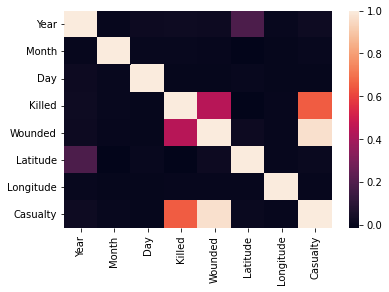

In [ ]:
dataplot= sns.heatmap(terrorism_df.corr())

***2. What are the most regions which were attacked?***

In [ ]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [ ]:
print(terrorism_df['Region'].nunique())

12


In [ ]:
terrorism_df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

In [ ]:
region = pd.crosstab(terrorism_df.Year,terrorism_df.Region)

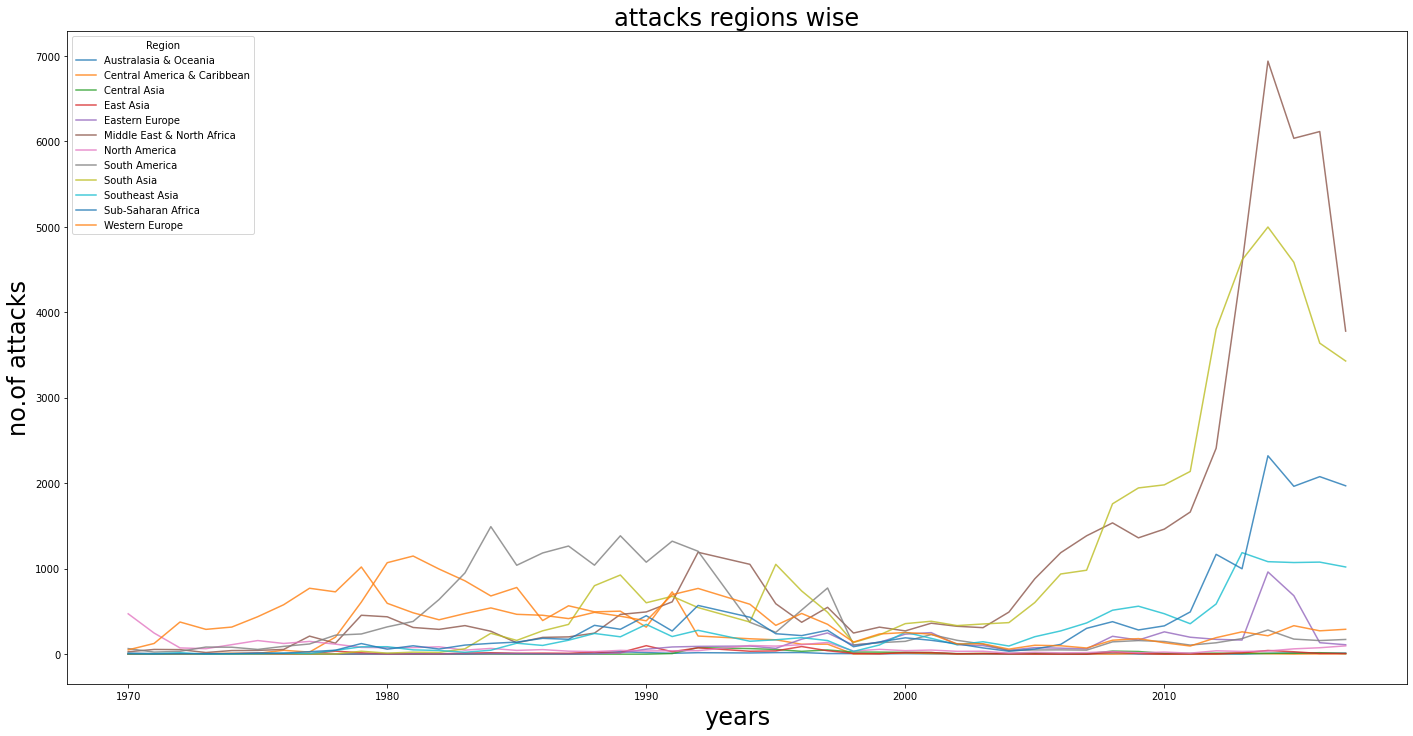

In [ ]:
region.plot(kind="line",stacked=False,alpha=0.8,figsize=(24,12))
plt.title("attacks regions wise",fontsize=24)
plt.xlabel("years",fontsize=24)
plt.ylabel("no.of attacks",fontsize=24)
plt.show()

***3. Which country has the highest number of attacks?***

In [ ]:
#Since we have data of 205 countries, we will find out some of the top 15 countries with high number of attacks
terrorism_df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

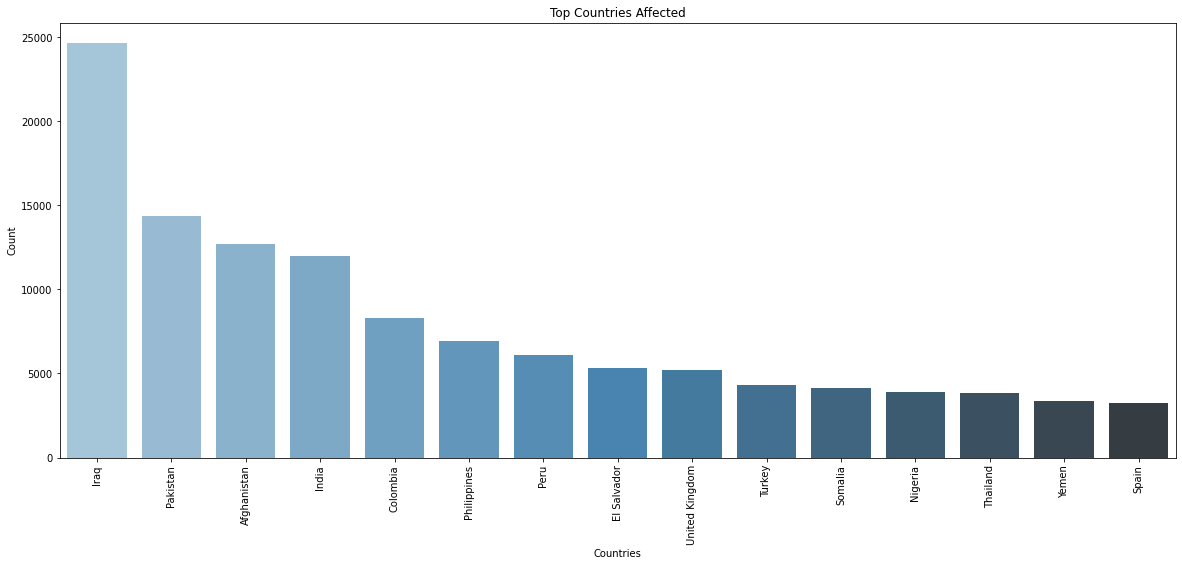

In [ ]:
#Presenting top 15 countries with high number of attacks
plt.subplots(figsize=(20,8))
sns.barplot(terrorism_df['Country'].value_counts()[:15].index,terrorism_df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

***4. Which City has the highest number of attacks?***

In [ ]:
city_attacks = terrorism_df["City"].value_counts()[1:7]
city_attacks

Baghdad     7589
Karachi     2652
Lima        2359
Mosul       2265
Belfast     2171
Santiago    1621
Name: City, dtype: int64

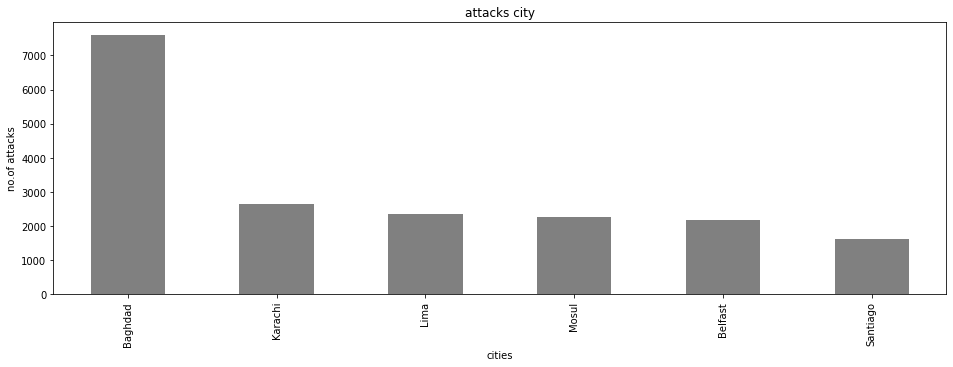

In [ ]:
city_attacks.plot(kind="bar",figsize=(16,5),color=("grey"))
plt.title("attacks city")
plt.xlabel("cities")
plt.ylabel("no.of attacks")
plt.show()

***5.Which country had the highest number of terrorist attacks around the world from 1970 through 2017?***

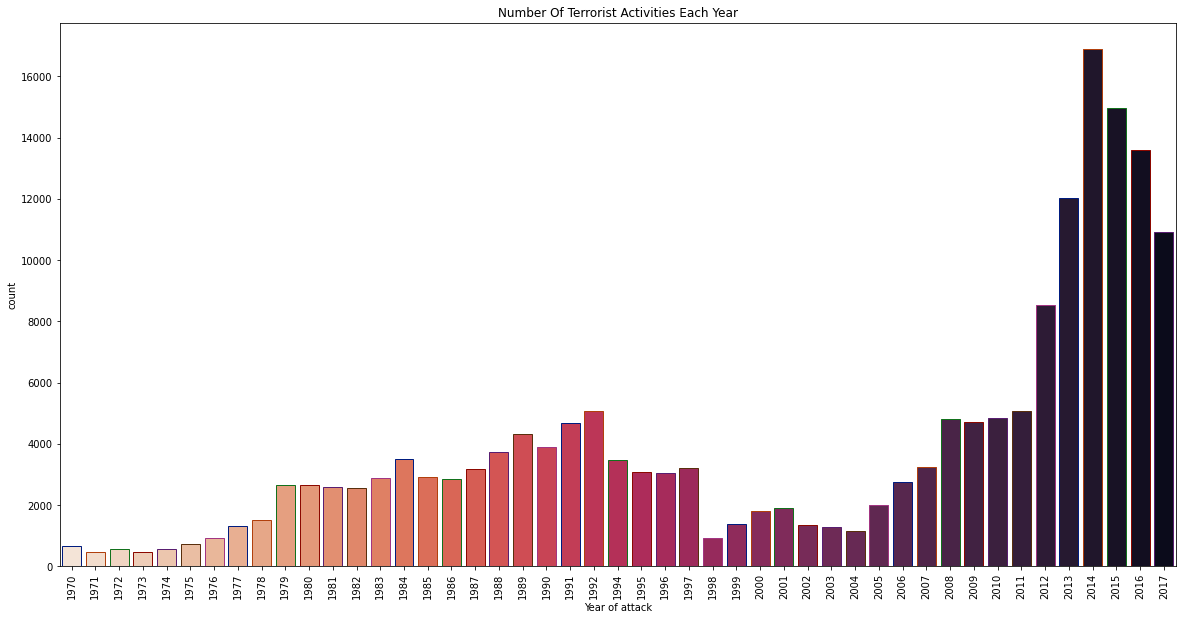

In [ ]:
#Attack over the years
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=terrorism_df,palette='rocket_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

***6.What were the attack types adopted by the terrorists to spread terrorism?***

In [ ]:
print(terrorism_df['Attack_type'].unique())


['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [ ]:
print(terrorism_df['Attack_type'].nunique())

9


Text(0.5, 1.0, 'Based on Attack type')

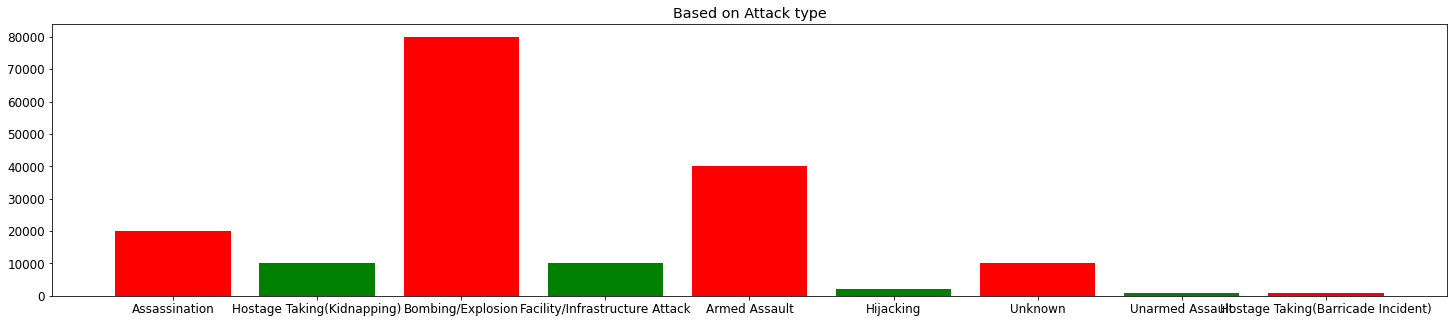

In [ ]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
x= ['Assassination', 'Hostage Taking(Kidnapping)', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault', 'Hostage Taking(Barricade Incident)']
h = [20000, 10000, 80000, 10000, 40000, 2000, 10000, 1000, 1000]
c = ['Red', 'Green', 'Red', 'Green','Red', 'Green', 'Red', 'Green', 'Red']
plt.bar(x, height = h, color = c)
plt.xticks(rotation = 0)
plt.title('Based on Attack type')

***7.Which types of weapons were used by the terrorists most?***

In [ ]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']


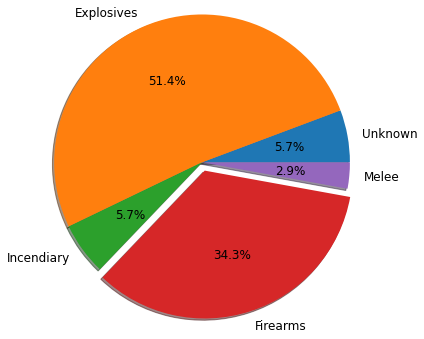

In [ ]:
weapons = terrorism_df['Weapon_type'].value_counts()[0:6]
weapons_no = [10000, 90000, 10000, 60000, 5000]
weapons_labels = ['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Melee' ]
plt.axis('equal')
plt.pie(weapons_no,labels=weapons_labels, radius = 1.7, autopct = '%0.1f%%' ,shadow = True, explode = [0,0,0,0.1,0])
plt.show()

***8.Which were the top leading gangs?***

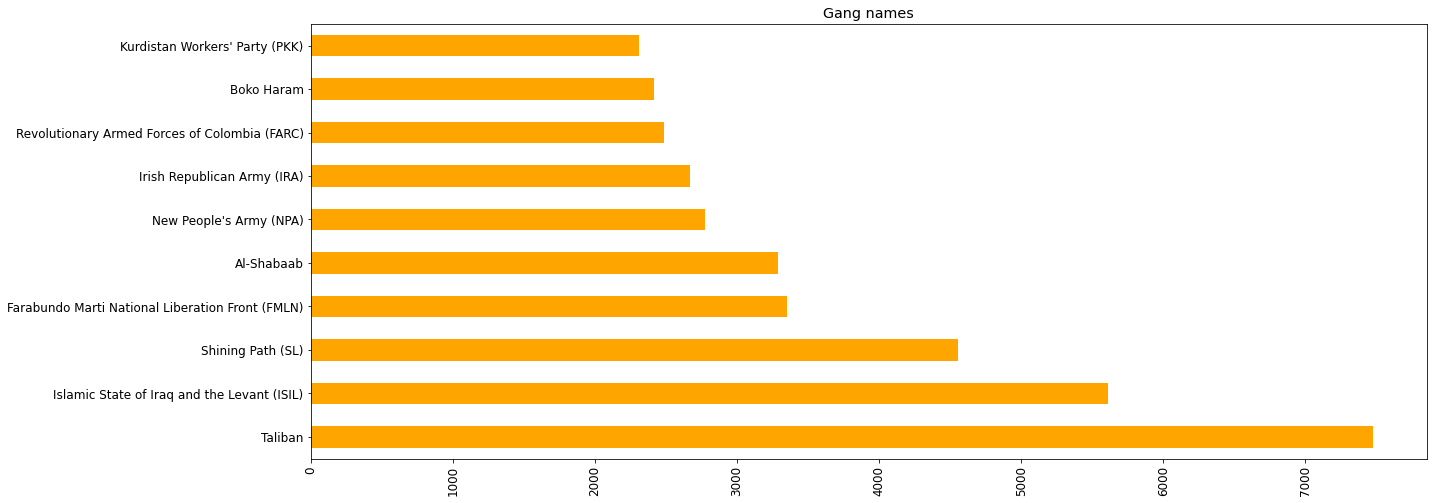

In [ ]:
Gang = terrorism_df['Gang_name'].value_counts()[1:11]
Gang.plot(kind='barh',color='orange', figsize=(20,8))
plt.xticks(rotation = 90)
plt.title("Gang names")
plt.show()

***9. What were the casualties?***

In [ ]:
kw = terrorism_df[['Year','Killed','Wounded']].groupby('Year').sum()


In [ ]:
terrorism_df['Killed'].value_counts()

In [ ]:
terrorism_df['Wounded'].value_counts()

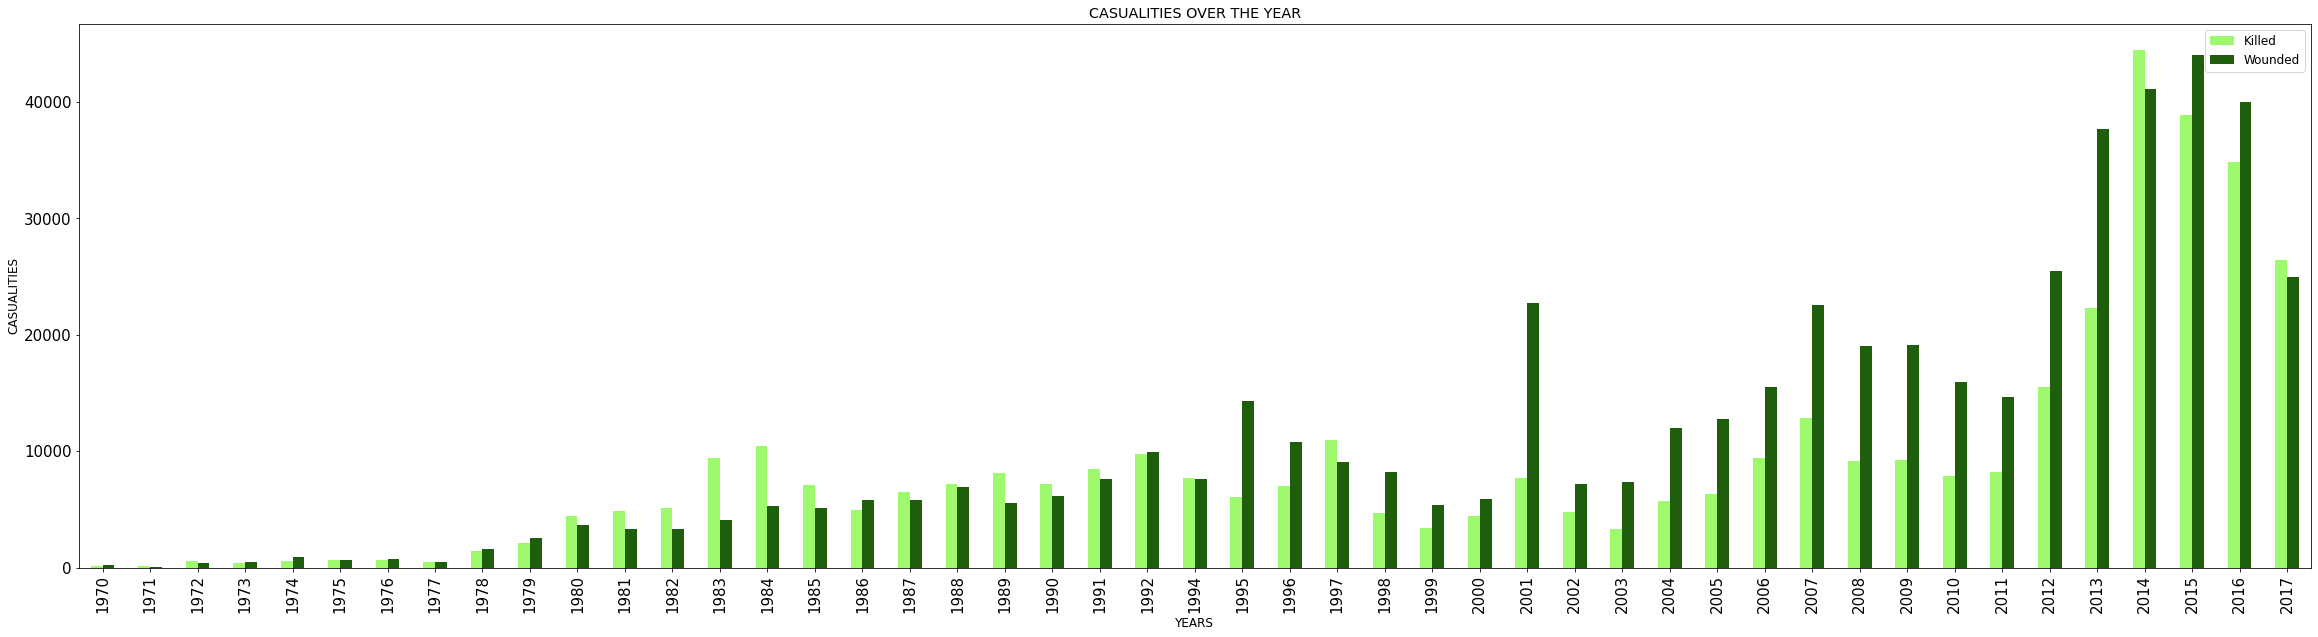

In [ ]:
#PLOTTING A STACKED BAR GRAPH OF CASUALITIES (KILLED AND WOUNDED)
kw = terrorism_df[['Year','Killed','Wounded']].groupby('Year').sum()
kw.head()
kw.plot(kind='bar', color=('#9ef96d','#1f5e0c'),figsize=(40,10),fontsize=15)
plt.title("CASUALITIES OVER THE YEAR")
plt.xlabel('YEARS')
plt.ylabel('CASUALITIES')
plt.show()


***Conclusion***

After going through the dataset we got to know-

.The Middle East & North Africa leads 1st among all the regions and then South Asia takes 2nd place.

.Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.

.In terms of city Baghdad is at top.

.Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards.From 2014 onwards count started decreasing.

.Most of the attacks were through either Bombing or Explosion.

.The weapon type which were used the most are bombs and firearms.

.The gang which was at top for spread of terrorism is taliban.

.Most of the attacks were in between 2012 to 2017 and so the casualties are more between these years.
